In [119]:
# pip install textacy

## Load the Data

In [2]:
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

In [3]:
# process to load data from google drive
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [4]:
#https://drive.google.com/file/d/1j9v_kxmwACTUihPJE_sL2bjhxb_SlhlZ/view
# fileDownloaded = drive.CreateFile({'id':'1j9v_kxmwACTUihPJE_sL2bjhxb_SlhlZ'})

In [5]:
# fileDownloaded.GetContentFile('universal_studio_branches 2.csv')

In [6]:
import pandas as pd
import re
from textacy import preprocessing

In [7]:
studio_reviews = pd.read_csv('universal_studio_branches 2.csv', encoding = 'UTF-8')
studio_reviews.drop_duplicates(subset=['review_text'], inplace = True)
studio_reviews.reset_index(drop=True)
studio_reviews.head()

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida


## Exploratory Data Analysis

In [8]:
studio_reviews['branch']=studio_reviews['branch'].str[18:]

In [9]:
import numpy as np
import datetime
studio_reviews['joined date']=pd.to_datetime(studio_reviews['written_date'])
studio_reviews['Year']=studio_reviews['joined date'].dt.year

In [10]:
F=['Florida']
J=['Japan']
S=['Singapore']
RegionAll=['Florida', 'Japan', 'Singapore']


In [11]:
YearA=range(2002,2007)
YearB=range(2007,2012)
YearC=range(2012,2017)
YearD=range(2017,2022)
YearAll=range(2002,2022)


In [12]:
def df(year, branch):
    currData = studio_reviews[studio_reviews['branch'].isin(branch)][studio_reviews['Year'].isin(year)]
    return currData


### Rating Change across Time

In [13]:
infoFL=df(YearAll,F).groupby('Year').agg({'rating':'mean'}).reset_index().rename(columns = {'rating':'FL'})
infoJA=df(YearAll,J).groupby('Year').agg({'rating':'mean'}).reset_index().rename(columns = {'rating':'JA'})
infoSG=df(YearAll,S).groupby('Year').agg({'rating':'mean'}).reset_index().rename(columns = {'rating':'SG'})

<ipython-input-12-f581d6e1f50d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  currData = studio_reviews[studio_reviews['branch'].isin(branch)][studio_reviews['Year'].isin(year)]


In [14]:
info=pd.merge(pd.merge(infoFL,infoJA,on='Year'),infoSG,on='Year').set_index('Year')
info

,FL,JA,SG
Year,,,
2010,3.636076,4.428571,3.411111
2011,3.914077,4.240000,4.014286
2012,3.974952,4.103448,4.373094
2013,4.144472,4.161677,4.370113
2014,4.265368,3.925595,4.245758
2015,4.424596,4.017943,4.338159
2016,4.371062,4.088954,4.400452
2017,4.384741,4.238095,4.318021
2018,4.287786,4.224590,4.182266


Text(0, 0.5, 'Rating')

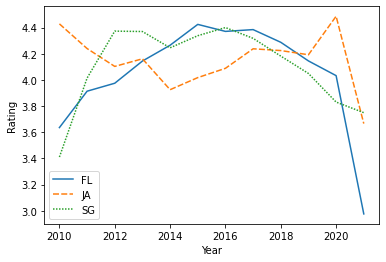

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=info)
plt.ylabel('Rating')

### Rate Number across Time

In [16]:
countF=pd.DataFrame(df(YearAll,F).Year.value_counts()).sort_index().reset_index().rename(columns={'index':'year',"Year":'FL'})
countS=pd.DataFrame(df(YearAll,S).Year.value_counts()).sort_index().reset_index().rename(columns={'index':'year',"Year":'SG'})
countJ=pd.DataFrame(df(YearAll,J).Year.value_counts()).sort_index().reset_index().rename(columns={'index':'year',"Year":'JA'})


<ipython-input-12-f581d6e1f50d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  currData = studio_reviews[studio_reviews['branch'].isin(branch)][studio_reviews['Year'].isin(year)]


In [17]:
count=pd.merge(pd.merge(countF,countJ,on='year'),countS,on='year').set_index('year')
count

,FL,JA,SG
year,,,
2010,316,7,90
2011,547,25,420
2012,1038,116,1115
2013,2035,167,1586
2014,3286,336,1827
2015,5570,836,2694
2016,5619,1023,2657
2017,4299,861,1981
2018,3930,610,1624


Text(0.5, 0, 'Year')

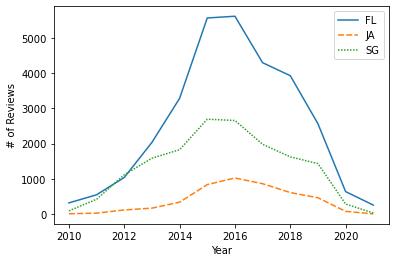

In [18]:
import seaborn as sns
sns.lineplot(data=count)
plt.ylabel('# of Reviews')
plt.xlabel('Year')

### Number of Reviews according to Segments

In [19]:
# define a function to count the word
def word_count(regex,review=studio_reviews['review_text']):
    count = 0
    for i in review:
        if len(re.findall(regex,i,re.IGNORECASE))!=0:
            count += 1
    return count

In [20]:
regex = [r"\bson(s)?\b",
        r"\b(dad|father)\b",
        r"\bhusband\b",
        r"\bdaughter(s)?\b",
        r"\b(mom|mother)\b",
        r"\bwife\b"]

In [21]:
people = ['son','father','husband','daughter','mother','wife']

In [22]:
for i in range(len(regex)):
    print(people[i],':',word_count(regex[i]))

son : 1746
father : 211
husband : 1486
daughter : 1710
mother : 289
wife : 1263


### According to holiday

In [23]:
studio_reviews.head()

,reviewer,rating,written_date,title,review_text,branch,joined date,Year
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Florida,2021-05-30,2021
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Florida,2021-05-30,2021
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Florida,2021-05-30,2021
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Florida,2021-05-29,2021
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Florida,2021-05-28,2021


In [24]:
positive_reviews=studio_reviews[studio_reviews['rating']>=4]
negative_reviews=studio_reviews[studio_reviews['rating']<4]

In [25]:
regex = [r'\b(christmas|xmas|x-mas|christ-mas)\b',
        r'\b(birthday|bday|b-day)\b',
        r'\banniversary\b',
        r'\bhalloween\b']

In [26]:
holiday = ['Christmas','Birthday','Anniversary','Halloween']

In [27]:
print('positive reviews')
for i in range(len(regex)):
    print(holiday[i],':',word_count(regex[i],review=positive_reviews['review_text']))

positive reviews
Christmas : 778
Birthday : 329
Anniversary : 107
Halloween : 1164


In [28]:
print('negative reviews')
for i in range(len(regex)):
    print(holiday[i],':',word_count(regex[i],review=negative_reviews['review_text']))

negative reviews
Christmas : 166
Birthday : 53
Anniversary : 22
Halloween : 293


## Data Cleaning

In [29]:
## combine title and review_text
studio_reviews['ori_review_text'] = studio_reviews['review_text']
studio_reviews['review_text'] = studio_reviews['title'] + ' ' + studio_reviews['review_text']
studio_reviews.head()

,reviewer,rating,written_date,title,review_text,branch,joined date,Year,ori_review_text
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,Universal is a complete Disaster - stick with ...,Florida,2021-05-30,2021,We went to Universal over Memorial Day weekend...
1,Jon,1.0,"May 30, 2021",Food is hard to get.,Food is hard to get. The food service is horri...,Florida,2021-05-30,2021,The food service is horrible. I’m not reviewin...
2,Nerdy P,2.0,"May 30, 2021",Disappointed,Disappointed I booked this vacation mainly to ...,Florida,2021-05-30,2021,I booked this vacation mainly to ride Hagrid m...
3,ran101278,4.0,"May 29, 2021",My opinion,My opinion When a person tries the test seat f...,Florida,2021-05-29,2021,When a person tries the test seat for the ride...
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"The Bourne Stuntacular...MUST SEE Ok, I can't ...",Florida,2021-05-28,2021,"Ok, I can't stress enough to anyone and everyo..."


### Regex Cleaning

In [30]:
preproc = preprocessing.make_pipeline(
            preprocessing.remove.punctuation,
            preprocessing.replace.numbers,
            preprocessing.replace.currency_symbols,
            preprocessing.normalize.whitespace)
# before: We spend $730 on our 7 years old son. It''s so expensive!
# after: We spend _CUR__NUMBER_ on our _NUMBER_ years old son Its so expensive

In [31]:
def regex_clean(text):
    text = re.sub(r'\b(3|4)-D\b', r'\1D', text, flags=re.IGNORECASE)
    text = preproc(text)
    text = re.sub(r'\bUniversal( studio(s)?)?( park(s)?)?\b', '_UNIVERSAL_STUDIO_', text, flags=re.IGNORECASE)
    text = re.sub(r'\b(Island of Adventure|Islands of Adventure)\b', '_ISLAND_OF_ADVENTURE_', text, flags=re.IGNORECASE)
    text = re.sub(r'\bDisney( park(s)?)?( world)?\b', '_DISNEY_', text, flags=re.IGNORECASE)
    text = re.sub(r'\b(express|fast) (pass(es)?|ticket(s)?)\b', '_EXPRESS_PASS_', text, flags=re.IGNORECASE)
    text = re.sub(r'\b((park|park to park) (pass(es)?|ticket(s)?|passport(s)?)|park to park)\b', '_PARK_PASS_', text, flags=re.IGNORECASE)
    text = re.sub(r'\b(Harry Potter|HarryPotter)( world(s)?| ride(s)?)?\b', '_HARRY_POTTER_', text, flags=re.IGNORECASE)
    text = re.sub(r'\b(Halloween Horror Night(s)?|Halloween Horror|Halloween Night(s)?)\b', '_HALLOWEEN_HORROR_NIGHT_', text, flags=re.IGNORECASE)
    text = re.sub(r'\b(Hollywood )?Rip Ride (Rocket|Rockit)\b', '_RIP_RIDE_ROCKIT_', text, flags=re.IGNORECASE)
    text = re.sub(r'\bJurassic Park( Ride)?\b', '_JURASSIC_PARK_RIDE_', text, flags=re.IGNORECASE)
    text = re.sub(r'\b((Roller Coaster)|Ride)\b', '_RIDE_', text, flags=re.IGNORECASE) 
    text = re.sub(r'\b(Theme Park(s)?|ThemePark)\b', '_THEME_PARK_', text, flags=re.IGNORECASE)    
    return text

In [32]:
studio_reviews['review_text'] = [regex_clean(text) for text in studio_reviews['review_text']]

### Stopwords Removal

In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bingxin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/bingxin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'am', 'and', 'in', 'of', 'doing', "wouldn't", 'should', 'its', 'against', 'didn', 'couldn', 'm', 've', 'for', 'was', 'while', 'd', "couldn't", 'him', 'a', 'i', 'then', "you've", 'both', 'has', 'into', 'myself', 'can', 'these', 'y', 'too', "shan't", "she's", 'before', 'had', 'yours', 'hers', 'if', 'over', 'be', 'so', 'won', 'yourselves', 'during', 'through', "won't", 'this', 'don', "weren't", 'do', 'needn', 'our', 't', 'as', "needn't", 'those', 'have', 'wasn', 'than', 'with', 'her', 'did', 'up', 'that', 'shouldn', 'weren', 'were', 'other', 'his', 'll', 'ain', 'having', "you'll", 'at', 'not', "it's", 'how', 'any', 'the', 'isn', "haven't", 'me', 'to', 'haven', 'hadn', 'whom', 'on', 'himself', 'them', 'very', 'ma', 'out', 'there', "don't", 'their', "that'll", "shouldn't", 'shan', "hadn't", 'but', 'itself', 'my', 'between', 'are', 'is', 'again', 'because', 's', 'herself', 'yourself', 'ours', 'further', 'now', 'doesn', 'until', 'does', 'same', 'after', 'ourselves', 'your', 'each', 'down', '

In [36]:
stop_words_remove = ['no', 'nor', 'not', 'don', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'mightn', 'mustn', 'needn', 'shouldn', 'shan', 'wasn', 'weren', 'won', 'wouldn']
stop_words_add = ['_cur__number_', '_number_', '_cur_']

In [37]:
stop_words.update(stop_words_add)
stop_words = {word for word in stop_words if word not in stop_words_remove}

In [38]:
def remove_stopwords(text):
    new_text = ' '.join([word for word in nltk.word_tokenize(text) if word.lower() not in stop_words])
    return new_text

In [39]:
studio_reviews['review_text'] = [remove_stopwords(text) for text in studio_reviews['review_text']]

### Lemmatization

In [40]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/bingxin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/bingxin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
 
lemmatizer = WordNetLemmatizer()
 
# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
   if nltk_tag.startswith('J'):
       return wordnet.ADJ
   elif nltk_tag.startswith('V'):
       return wordnet.VERB
   elif nltk_tag.startswith('N'):
       return wordnet.NOUN
   elif nltk_tag.startswith('R'):
       return wordnet.ADV
   else:         
       return None
 
def lemmatize_sentence(sentence):
   #tokenize the sentence and find the POS tag for each token
   nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence)) 
   #tuple of (token, wordnet_tag)
   wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
   lemmatized_sentence = []
   for word, tag in wordnet_tagged:
       if tag is None:
           #if there is no available tag, append the token as is
           lemmatized_sentence.append(word)
       else:       
           #else use the tag to lemmatize the token
           lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
   return " ".join(lemmatized_sentence)
studio_reviews['review_text'] =studio_reviews['review_text'].apply(lemmatize_sentence) 

In [42]:
# !python3 -m spacy download en_core_web_md
# import en_core_web_md
# import spacy
# from scipy.spatial.distance import cosine

# nlp = spacy.load('en_core_web_md')

# def lemmatize_spacy(text):
#   doc = nlp(text)
#   lemmatized_sentence = []
#   for token in doc:
#     lemmatized_sentence.append(token.lemma_)
#   return ' '.join(lemmatized_sentence)

# studio_reviews['review_text'] =studio_reviews['review_text'].apply(lemmatize_spacy) 

In [43]:
# studio_reviews.to_csv('studio_reviews_V2.csv')

## Word Count

In [44]:
# from sklearn.feature_extraction import text 
# reviews_text = studio_reviews['review_text']
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(ngram_range=(3,3),binary=True, min_df=4, max_features=500)
# X = vectorizer.fit_transform(reviews_text) 

In [45]:
# corpus_df = pd.DataFrame(X.toarray().transpose(), index=vectorizer.get_feature_names_out())
# corpus_df

In [46]:
# corpus_df = pd.DataFrame(corpus_df.sum(axis=1), columns=["score"])
# corpus_df.sort_values(by="score", ascending=False, inplace=True)
# corpus_df.head(20)

## N-Gram

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

vectorizer = TfidfVectorizer(ngram_range=(3, 3),
                             token_pattern=r'\b[a-zA-Z]{2,}\b',
                             min_df=0.001, max_features=20,binary=True)


In [49]:
from typing import List
def get_score(year: List[int], branch: str, rating_list: List[int]):
    currData = studio_reviews[studio_reviews['branch'].isin(branch)][studio_reviews['Year'].isin(year)]
    poor=currData[currData['rating'].isin(rating_list)]
    corpus = list(poor["review_text"].values)
    X = vectorizer.fit_transform(corpus)
    terms = vectorizer.get_feature_names()
    tf_idf = pd.DataFrame(X.toarray().transpose(), index=terms)
    tf_idf = tf_idf.sum(axis=1)
    score = pd.DataFrame(tf_idf, columns=["score"])
    score.sort_values(by="score", ascending=False, inplace=True)
    return score


In [50]:
score = get_score(YearAll, F, [1, 2, 3])
score.head(10)

<ipython-input-49-1b874c9b54db>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  currData = studio_reviews[studio_reviews['branch'].isin(branch)][studio_reviews['Year'].isin(year)]


,score
not worth money,112.006273
park one day,79.656019
waste time money,75.104357
never go back,60.872592
single rider line,60.493962
don waste time,59.662516
long wait time,57.225706
not go back,55.855949
wait line hour,53.100913
wait long line,48.200626


## Word Cloud

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

<ipython-input-49-1b874c9b54db>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  currData = studio_reviews[studio_reviews['branch'].isin(branch)][studio_reviews['Year'].isin(year)]


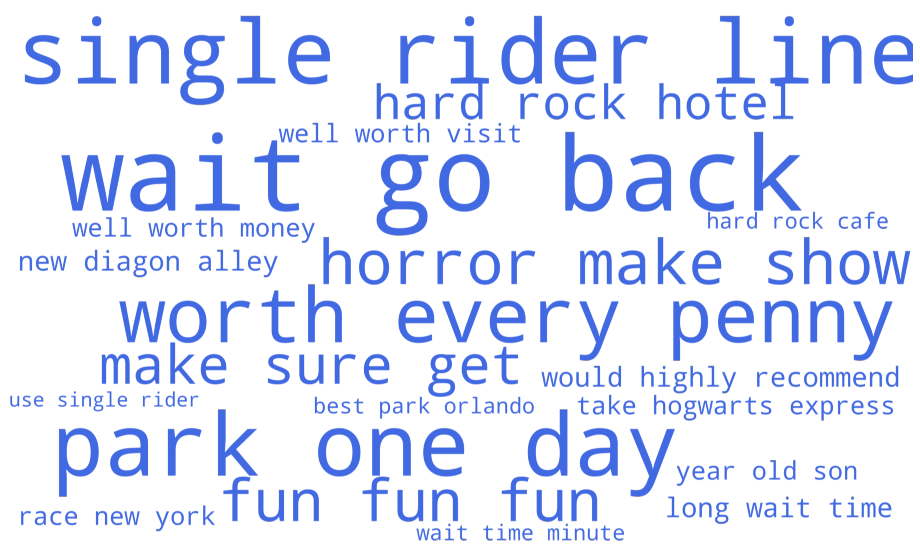

In [52]:
# Positive Sentiment Word Phrase Cloud (Florida)
d = {}
score = get_score(YearAll, F, [4, 5])
for i in score.index:
    d[i] = int(score.loc[i, 'score'])

# mk = imageio.imread("universal.jpeg")

w = WordCloud(width=500,height=300, background_color=None, mode="RGBA",
                normalize_plurals=False, # mask=mk,
                color_func=lambda *args, **kwargs: "royalblue", # colormap = 'Blues',
                scale=30)
w.generate_from_frequencies(d)

plt.figure(figsize=(20,10))
plt.imshow(w, interpolation='bilinear')
plt.axis("off")
plt.show()

<ipython-input-49-1b874c9b54db>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  currData = studio_reviews[studio_reviews['branch'].isin(branch)][studio_reviews['Year'].isin(year)]


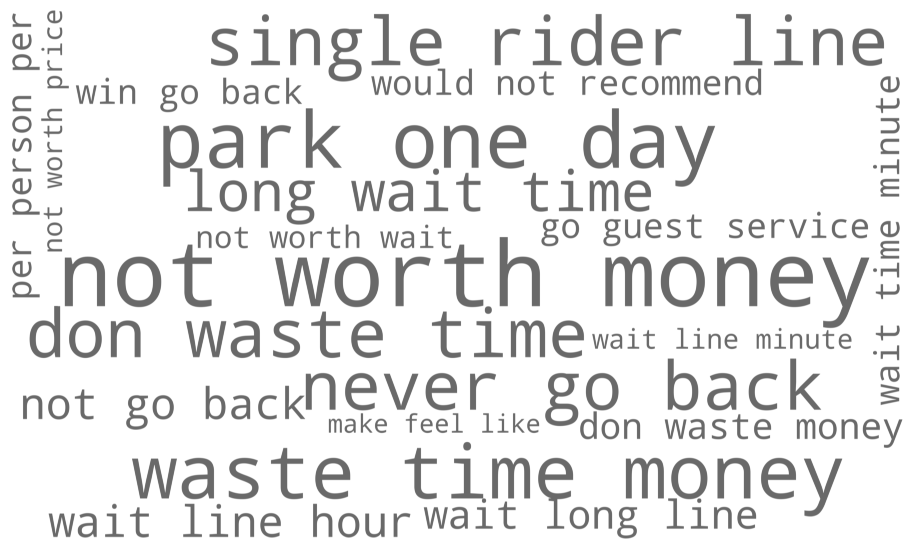

In [53]:
# Negative Sentiment Word Phrase Cloud
d = {}
score = get_score(YearAll, F, [1, 2, 3])
for i in score.index:
    d[i] = int(score.loc[i, 'score'])

# mk = imageio.imread("universal.jpeg")

w = WordCloud(width=500,height=300, background_color=None, mode="RGBA",
                normalize_plurals=False, # mask=mk,
                color_func=lambda *args, **kwargs: "dimgrey", # colormap = 'Greys',
                scale=30)
w.generate_from_frequencies(d)

plt.figure(figsize=(20,10))
plt.imshow(w, interpolation='bilinear')
plt.axis("off")
plt.show()

## Topic Modeling (NMF Model)

In [54]:
vectorizer = TfidfVectorizer(ngram_range=(4, 4),
                             token_pattern=r'\b[a-zA-Z]{2,}\b',
                             min_df=0.001,binary=True)

In [55]:
# studio_reviews_copy = studio_reviews.copy()
# studio_reviews_copy.review_text = studio_reviews_copy.review_text.str.replace(r'\btheme park(?:s)?\b', '_THEME_PARK_', regex = True)
# studio_reviews_copy.review_text = studio_reviews_copy.review_text.str.replace('_THEME_PARK_', '')

In [60]:
from sklearn.decomposition import NMF
from typing import List
import numpy as np
def topic_model(components: int, branch: str, min_year: int, max_year: int, rating_list: List[int], studio_reviews = studio_reviews):
  studio_reviews = studio_reviews[(studio_reviews.branch == branch) & (studio_reviews.Year >= min_year) & (studio_reviews.Year <= max_year)]
  studio_reviews = studio_reviews[studio_reviews.rating.isin(rating_list)]

  X_studio, studio_terms = vectorizer.fit_transform(studio_reviews.review_text), vectorizer.get_feature_names()
  studio_tf_idf = pd.DataFrame(X_studio.toarray(), columns=studio_terms)
  print(f"Studio TF-IDF: {studio_tf_idf.shape}")
  print(studio_tf_idf.head(5))

  # Fit NMF Model
  nmf = NMF(n_components=components)
  W_studio = nmf.fit_transform(X_studio)
  H_studio = nmf.components_
  print(f"Original shape of X news is {X_studio.shape}")
  print(f"Decomposed W news matrix is {W_studio.shape}")
  print(f"Decomposed H news matrix is {H_studio.shape}")
  return studio_reviews, studio_tf_idf, W_studio, H_studio

In [61]:
# Top Ngram
from typing import List
import numpy as np

def get_top_tf_idf_tokens_for_topic(H: np.array, feature_names: List[str], num_top_tokens: int = 5):
  """
  Uses the H matrix (K components x M original features) to identify for each
  topic the most frequent tokens.
  """
  for topic, vector in enumerate(H):
    print(f"TOPIC {topic}\n")
    total = vector.sum()
    top_scores = vector.argsort()[::-1][:num_top_tokens]
    token_names = list(map(lambda idx: feature_names[idx], top_scores))
    strengths = list(map(lambda idx: vector[idx] / total, top_scores))
    
    for strength, token_name in zip(strengths, token_names):
      print(f"\b{token_name} ({round(strength * 100, 1)}%)\n")
    print(f"=" * 50)

In [62]:
# Get the Top Documents For Each Topic
import numpy as np
def get_top_documents_for_each_topic(W: np.array, documents: List[str], num_docs: int = 5):
  sorted_docs = W.argsort(axis=0)[::-1]
  top_docs = sorted_docs[:num_docs].T
  per_document_totals = W.sum(axis=1)
  for topic, top_documents_for_topic in enumerate(top_docs):
    print(f"Topic {topic}")
    for doc in top_documents_for_topic:
      score = W[doc][topic]
      percent_about_topic = round(score / per_document_totals[doc] * 100, 1)
      print(f"{percent_about_topic}%", documents[doc])
    print("=" * 50)

### Postive Topic

In [63]:
studio_reviews_topic, studio_tf_idf, W_studio, H_studio = topic_model(3, 'Florida', 2002, 2021, [4, 5])

Studio TF-IDF: (24889, 30)
   cant wait go back  diagon alley escape gringotts  \
0                0.0                            0.0   
1                0.0                            0.0   
2                0.0                            0.0   
3                0.0                            0.0   
4                0.0                            0.0   

   diagon alley hogwarts express  fallon race new york  go back next year  \
0                            0.0                   0.0                0.0   
1                            0.0                   0.0                0.0   
2                            0.0                   0.0                0.0   
3                            0.0                   0.0                0.0   
4                            0.0                   0.0                0.0   

   go single rider line  great day great day  great park great park  \
0                   0.0                  0.0                    0.0   
1                   0.0              

/Users/bingxin/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [64]:
get_top_tf_idf_tokens_for_topic(H_studio, studio_tf_idf.columns.tolist(), 5)

TOPIC 0

use single rider line (96.8%)

wizarding world diagon alley (2.0%)

diagon alley escape gringotts (0.6%)

new york san francisco (0.5%)

fallon race new york (0.0%)

TOPIC 1

stay hard rock hotel (93.5%)

stay one site hotel (1.7%)

fallon race new york (1.5%)

jimmy fallon race new (1.5%)

per person per day (1.0%)

TOPIC 2

men black alien attack (84.0%)

wizarding world diagon alley (9.3%)

year old year old (1.5%)

new york san francisco (1.5%)

diagon alley hogwarts express (0.9%)



In [65]:
get_top_documents_for_each_topic(W_studio, studio_reviews_topic.review_text.tolist(), num_docs=8)

Topic 0
100.0% much fun come _HARRY_POTTER_ experience super well do enjoy rest park nephew get picked participate Fear Factor much fun us watch didn _EXPRESS_PASS_ didn need fine use single rider line get every _RIDE_ want fast much easy _DISNEY_
100.0% Single Rider Line way go one swing use single rider line cut huge amount time line wait
100.0% Spring break Great place visit impressed people wheelchairs able _RIDE_ rid suggest go park open not wait long time also suggest use single rider line rather pay extra per person _EXPRESS_PASS_ rid end gift shop meet party u go rid separate time
100.0% Fantastic experience past week go past week spring break teacher mission visit _HARRY_POTTER_ review separately get two day _PARK_PASS_ need _RIDE_ Hogwarts Express train park get ticket online sure get cheap tix local merchant buy tix online print ticket go straight gate ticket scan fingerprint like _DISNEY_ notice integrated system visit two _HARRY_POTTER_ exhibit get line Hogwarts Express ti

### Negative Topic

In [66]:
vectorizer = TfidfVectorizer(ngram_range=(3, 3),
                             token_pattern=r'\b[a-zA-Z]{2,}\b',
                             min_df=0.001,binary=True)

In [67]:
studio_reviews_topic, studio_tf_idf, W_studio, H_studio = topic_model(2, 'Florida', 2002, 2021, [1, 2, 3])

Studio TF-IDF: (5693, 1255)
   able get ride  able go ride  actual wait time  actually get park  \
0            0.0           0.0               0.0                0.0   
1            0.0           0.0               0.0                0.0   
2            0.0           0.0               0.0                0.0   
3            0.0           0.0               0.0                0.0   
4            0.0           0.0               0.0                0.0   

   add insult injury  additional per person  additional per ticket  \
0                0.0                    0.0                    0.0   
1                0.0                    0.0                    0.0   
2                0.0                    0.0                    0.0   
3                0.0                    0.0                    0.0   
4                0.0                    0.0                    0.0   

   adult two kid  allow bring food  almost hour get  ...  year old girl  \
0            0.0               0.0              0

/Users/bingxin/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [68]:
get_top_tf_idf_tokens_for_topic(H_studio, studio_tf_idf.columns.tolist(), 5)

TOPIC 0

not worth money (25.0%)

worth money pay (1.8%)

worth money go (1.6%)

save money go (1.5%)

don waste money (1.1%)

TOPIC 1

waste time money (13.1%)

don waste time (11.3%)

never go back (2.2%)

not waste time (1.4%)

waste time go (1.2%)



In [69]:
get_top_documents_for_each_topic(W_studio, studio_reviews_topic.review_text.tolist(), num_docs=8)

Topic 0
100.0% Not worth money must go three ride Waste money expensive find LA Singapore much good also don serve Halal food limit eat least vegetarian option not Halal place world
100.0% Not worth money old mediocre rid Graphics _HARRY_POTTER_ not good pricey quality number ride available
100.0% Disappointed expect read nuber review decidin whether go not go decide go visit _UNIVERSAL_STUDIO_ pay two us excite enter park see rides character Half way day start get little disappoined feeling rip opinion park enterance fee way overprice not worth money also visit _UNIVERSAL_STUDIO_ Singapore much value money city alot well thing see Sorry Orlando overrate
100.0% not worth money Went _UNIVERSAL_STUDIO_ september waste money whole park one big commercial circus average rides staff extremly rude line short first site line outside one attraction discover line inside building many time longer see park charge price _DISNEY_ not even half fun plan go Orlando money spent well go _DISNEY_
100.0%

## Random Forest

In [107]:
vectorizer = TfidfVectorizer(ngram_range=(3, 3),
                             token_pattern=r'\b[a-zA-Z]{2,}\b',
                            min_df=0.001, max_features=300,binary=True)

In [108]:
def regex_clean(text):
    text = re.sub(r'\b(wait time [a-zA-Z]+)|(wait line [a-zA-Z]+)|(ride [a-zA-Z]+ wait)|(wait [a-zA-Z]+ ride)|([a-zA-Z]+ wait time)|(wait [a-zA-Z]+ time)\b', 'ride wait time', text, flags=re.IGNORECASE)
    text = re.sub(r'\bticket\b', 'pass', text, flags=re.IGNORECASE)
    return text
studio_reviews['review_text'] = [regex_clean(text) for text in studio_reviews['review_text']]

In [109]:
def partition(x):
    sentiment = ''
    if x <= 3:
        sentiment = 0
    else:
        sentiment = 1
    return sentiment

In [110]:
studio_reviews['Sentiment'] = studio_reviews['rating'].map(lambda x:partition(x))

In [111]:
X = vectorizer.fit_transform(studio_reviews.review_text)
labels = studio_reviews.Sentiment.values

In [112]:
pd.Series(labels).value_counts()

1    41671
0     9176
dtype: int64

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    labels, test_size=0.2,stratify=labels,random_state=42)

In [114]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)
acc_train = forest.score(X_train, y_train)
acc_test = forest.score(X_test, y_test)
print('Train Accuracy : {:.2f}%'.format(acc_train*100))
print('Test Accuracy  : {:.2f}%'.format(acc_test*100))

Train Accuracy : 85.21%
Test Accuracy  : 82.45%


In [115]:
feature_scores = pd.DataFrame({'Feature Names':vectorizer.get_feature_names(),'Feature Importance':forest.feature_importances_})

In [116]:
feature_scores.sort_values('Feature Importance',ascending=False,inplace=True)
feature_scores.head(10)

,Feature Names,Feature Importance
214,ride wait time,0.070409
273,waste time money,0.047488
170,not worth money,0.046708
165,not go back,0.040319
167,not many ride,0.017426
46,don waste money,0.017380
292,would not recommend,0.014833
47,don waste time,0.014042
91,go guest service,0.013035
262,wait time hour,0.011960


In [117]:
plt.rcParams.update({'figure.figsize':(10,8)})
plt.rcParams.update({'font.size':15})

<AxesSubplot:xlabel='Feature Importance', ylabel='Feature Names'>

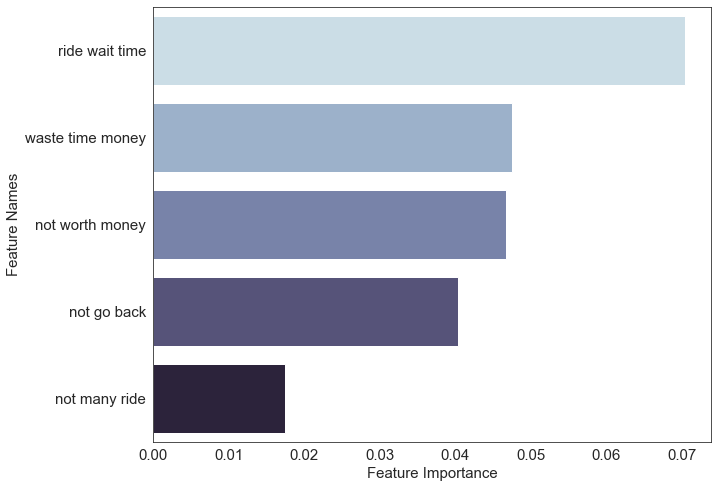

In [118]:
sns.set_style("white")
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.barplot(y='Feature Names',x='Feature Importance',data=feature_scores.head(5),palette="ch:s=.25,rot=-.25")
# plt.savefig('feature importance',bbox_inches = 'tight')